In [45]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 5.1 MB/s 
     |████████████████████████████████| 115 kB 49.9 MB/s 
     |████████████████████████████████| 120 kB 60.1 MB/s 
     |████████████████████████████████| 212 kB 40.4 MB/s 
     |████████████████████████████████| 127 kB 47.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [46]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random
from datasets import Dataset

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np

#Took Efficientnet-lite0 for Feature Extraction

In [ ]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224) #img- size 

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/visualsimilarity.zip' '/content/'

In [ ]:
!unzip '/content/visualsimilarity.zip'

Archive:  /content/visualsimilarity.zip
   creating: bottoms_resized_png/
  inflating: bottoms_resized_png/13079565VVD.png  
  inflating: bottoms_resized_png/13079565VVR.png  
  inflating: bottoms_resized_png/13108390UDD.png  
  inflating: bottoms_resized_png/13108390UDR.png  
  inflating: bottoms_resized_png/13110484CLD.png  
  inflating: bottoms_resized_png/13110484CLR.png  
  inflating: bottoms_resized_png/13162479UBD.png  
  inflating: bottoms_resized_png/13162479UBR.png  
  inflating: bottoms_resized_png/13180761CUD.png  
  inflating: bottoms_resized_png/13180761CUR.png  
  inflating: bottoms_resized_png/13192537MCD.png  
  inflating: bottoms_resized_png/13192537MCR.png  
  inflating: bottoms_resized_png/13224618QUD.png  
  inflating: bottoms_resized_png/13224618QUR.png  
  inflating: bottoms_resized_png/13260596HKD.png  
  inflating: bottoms_resized_png/13260596HKR.png  
  inflating: bottoms_resized_png/13315564GCD.png  
  inflating: bottoms_resized_png/13315564GCR.png  
  inflat

#**Extracting Feature vector for each vecto and storing it as JSON object** 

In [ ]:
def extract(file):
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  #display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...])
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

In [ ]:
vector_dict = {}
path_dict ={}
for ind, item in enumerate(os.listdir( '/content/bottoms_resized_png' )):
    print(ind,item) 
    path = os.path.join('/content/bottoms_resized_png', item) 
    #img = image.load_img(path, target_size=(32, 32))
    
    #x = image.img_to_array(img)
    #x = np.expand_dims(x, axis=0)
    #images = np.vstack([x])[0].tolist()
    vector = extract(path)
    path_dict[item[:-4]] = path
    vector_dict[item[:-4]] = vector.tolist()
    

0 35468704AHD.png
1 13585954RXR.png
2 13586338MJR.png
3 13586135RCD.png
4 13587997SOD.png
5 35468607FID.png
6 13586101XHR.png
7 13586069LPD.png
8 35468261LSD.png
9 13585759FQR.png
10 13586726BER.png
11 13587037OQR.png
12 13559894PND.png
13 13585468XKD.png
14 13585342PID.png
15 13586227LMD.png
16 35468674PDR.png
17 13575814LOR.png
18 35469062DXD.png
19 13498054VRR.png
20 13587023AED.png
21 13588742NWD.png
22 35468800GXR.png
23 13586416QDD.png
24 13587597BDR.png
25 35469245GBD.png
26 35468917BDR.png
27 13586451RPD.png
28 13586302TUR.png
29 13584698RXR.png
30 13586898HLD.png
31 35468590GFR.png
32 13588592JKD.png
33 35468804CTR.png
34 13586263HAR.png
35 13586043TOR.png
36 13587684HLD.png
37 35468876BQR.png
38 35468958FIR.png
39 13585410SAD.png
40 13585501SND.png
41 13587111WSD.png
42 35468816CTD.png
43 35468892JOD.png
44 35469772DFD.png
45 13079565VVD.png
46 13482030TID.png
47 13585517PMD.png
48 13559893FCD.png
49 13587273HFR.png
50 13589082JLD.png
51 13586469ACR.png
52 13588060KMD.png
53 

In [ ]:
from pprint import pprint
pprint(vector_dict['35468464IMD'])

[0.0,
 0.0,
 1.2059400081634521,
 0.02823033183813095,
 0.008607905358076096,
 0.0644526481628418,
 0.05020752176642418,
 0.6326779127120972,
 0.3464882969856262,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008355788886547089,
 0.0,
 0.011677905917167664,
 0.0,
 0.0,
 0.0,
 0.0,
 0.008628073148429394,
 0.0,
 0.0,
 0.12080425769090652,
 0.0,
 0.0,
 0.3310277462005615,
 0.12133216857910156,
 0.44846251606941223,
 0.8173195719718933,
 0.6641164422035217,
 0.0,
 0.11397874355316162,
 0.0,
 0.9434801936149597,
 0.23542749881744385,
 0.0,
 0.1508871167898178,
 0.0,
 0.09570189565420151,
 0.009833238087594509,
 0.0,
 0.269066721200943,
 0.0,
 0.0,
 0.07465274631977081,
 0.0,
 0.0,
 0.0,
 0.0,
 1.046200156211853,
 0.0,
 0.0,
 0.0137496218085289,
 0.0,
 0.0,
 0.0,
 0.11206204444169998,
 0.0,
 0.2751785218715668,
 0.0,
 0.07964777201414108,
 0.022849276661872864,
 0.8181341290473938,
 0.0,
 0.0005302903009578586,
 0.2620041072368622,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.20842762291431427,
 0.0,
 0.0,
 0.556420147418

In [ ]:
import json
with open('/content/vectors.json', 'w') as fp:
    json.dump(vector_dict,fp)
    fp.close()

In [ ]:
with open('/content/vectors.json','r') as jsonFile:
  vectors = json.load(jsonFile)
  jsonFile.close()

In [ ]:
print(vectors.keys())

dict_keys(['35468464IMD', '13587485NIR', '35468811TWD', '13627174ATD', '13588785UNR', '13586128HWD', '13192537MCR', '13587684HLR', '35468672COD', '13585007BKR', '13561690OIR', '35469154OGR', '35469830CLD', '35468864DFR', '35468912WUR', '13585567HJR', '35398224MHD', '35469015NHD', '13584997ADD', '13587111WSD', '13583498OWD', '13586139IVD', '13471485JER', '35468883EBR', '13586716UCR', '13587198EDD', '13586229QBD', '35469291FOD', '13529187UGD', '35448016KPR', '13586067UGR', '13586091AMD', '13586055AWR', '13585975IND', '35469108UID', '13585342STR', '13461429PCR', '13588843NED', '13586199VVD', '13585843HED', '13586472KMR', '13461429GQR', '35468903LDR', '13587434HSR', '35468883EBD', '13585686WUR', '35468937JSD', '13585847MGR', '13584294WPR', '13560931GLD', '13587513JOR', '13586235JKR', '13588323AOR', '13588288WXD', '35468785GJR', '13586192QXD', '13498054VRD', '13586964FRD', '35468261LSR', '13470449FFD', '13587119VGD', '13585560NFR', '13586062VER', '35468539XPR', '13498134WRD', '35469071AHD',

In [ ]:
print(len(vectors['35468464IMD']))

1280


# **Using 3 images to validate Image similarity using cosine Distances**

In [ ]:
jean1 = extract('/content/bottoms_resized_png/13079565VVR.png')
jean2 = extract('/content/bottoms_resized_png/13079565VVD.png')
skirt = extract('/content/bottoms_resized_png/13322221VND.png')

In [ ]:
from scipy.spatial import distance

In [ ]:
metric = 'cosine'

In [ ]:
!pip install cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


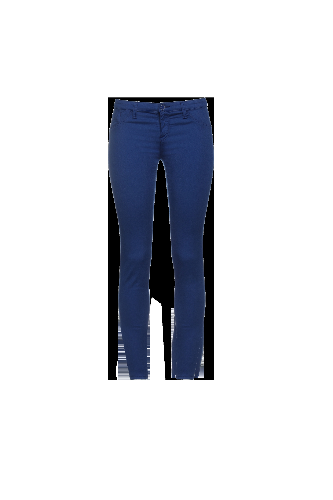

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img1= cv2.imread('/content/bottoms_resized_png/13079565VVR.png')

cv2_imshow(img1)

cv2.waitKey(0)

cv2.destroyAllWindows()


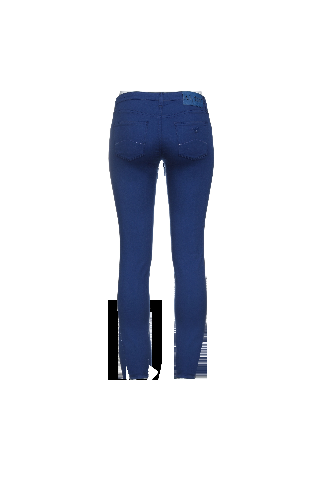

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img1= cv2.imread('/content/bottoms_resized_png/13079565VVD.png')

cv2_imshow(img1)

cv2.waitKey(0)

cv2.destroyAllWindows()

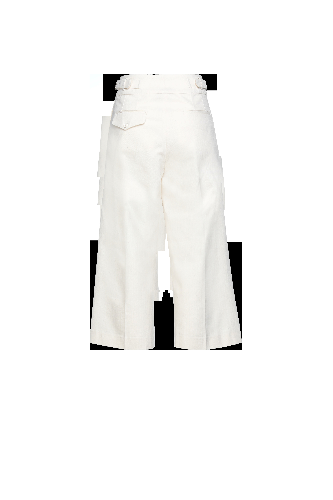

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img1= cv2.imread('/content/bottoms_resized_png/13322221VND.png')

cv2_imshow(img1)

cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
dc = distance.cdist([jean1], [jean1], metric)[0]
print(dc)
print("the distance between jean1 and the jean1 is {}".format(dc))

[0.]
the distance between jean1 and the jean1 is [0.]


In [ ]:
dc = distance.cdist([jean1], [jean2], metric)[0]
print(dc)
print("the distance between jean1 and the jean2 is {}".format(dc))

[0.29833915]
the distance between jean1 and the jean2 is [0.29833915]


In [ ]:
dc = distance.cdist([jean1], [skirt], metric)[0]
print(dc)
print("the distance between jean1 and the skirt is {}".format(dc))

[0.45481624]
the distance between jean1 and the skirt is [0.45481624]


#**Performing Query Based search for particular image**

In [ ]:

from scipy.spatial import distance
metric = 'cosine'

def find_similar_images(img_path, vector_dict):
  
  feature_vector = extract(img_path)
  similarity_dict = {}
  for key,value in vector_dict.items():

    sim = distance.cdist([feature_vector], [value], metric)[0]
    similarity_dict[key] = sim
  sorted_similarity = sorted(similarity_dict.items(), key=lambda x: x[1], reverse=False)  
  suggested_ls = []
  for i in range(0,10):
    suggested_ls.append(sorted_similarity[i][0])
    print(sorted_similarity[i][0],sorted_similarity[i][1])
  return suggested_ls

In [ ]:
suggested_ls = find_similar_images('/content/bottoms_resized_png/13586062VER.png', vector_dict)

13586062VER [0.]
13588319VTD [0.14460529]
13643117AAR [0.17039089]
13586472KMD [0.17595911]
13428218QFD [0.17746354]
13573117RRD [0.17778571]
13584405AHD [0.17922314]
13586572WAR [0.179826]
13585945CJD [0.18153457]
13585406MCD [0.18182743]


In [ ]:
print(suggested_ls)

['13079565VVR', '13589082JLR', '13400677WER', '13586212XER', '13586197WBD', '13586572WAR', '13531518MKD', '13586740UUR', '13588785UNR', '13589347MSR']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(200, 200))
columns = 2
rows = 5
for i in range(1, columns*rows +1):
    path = path_dict[suggested_ls[i-1]]
    img = cv2.imread(path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Text(0.5, 1.0, 'Fourth')

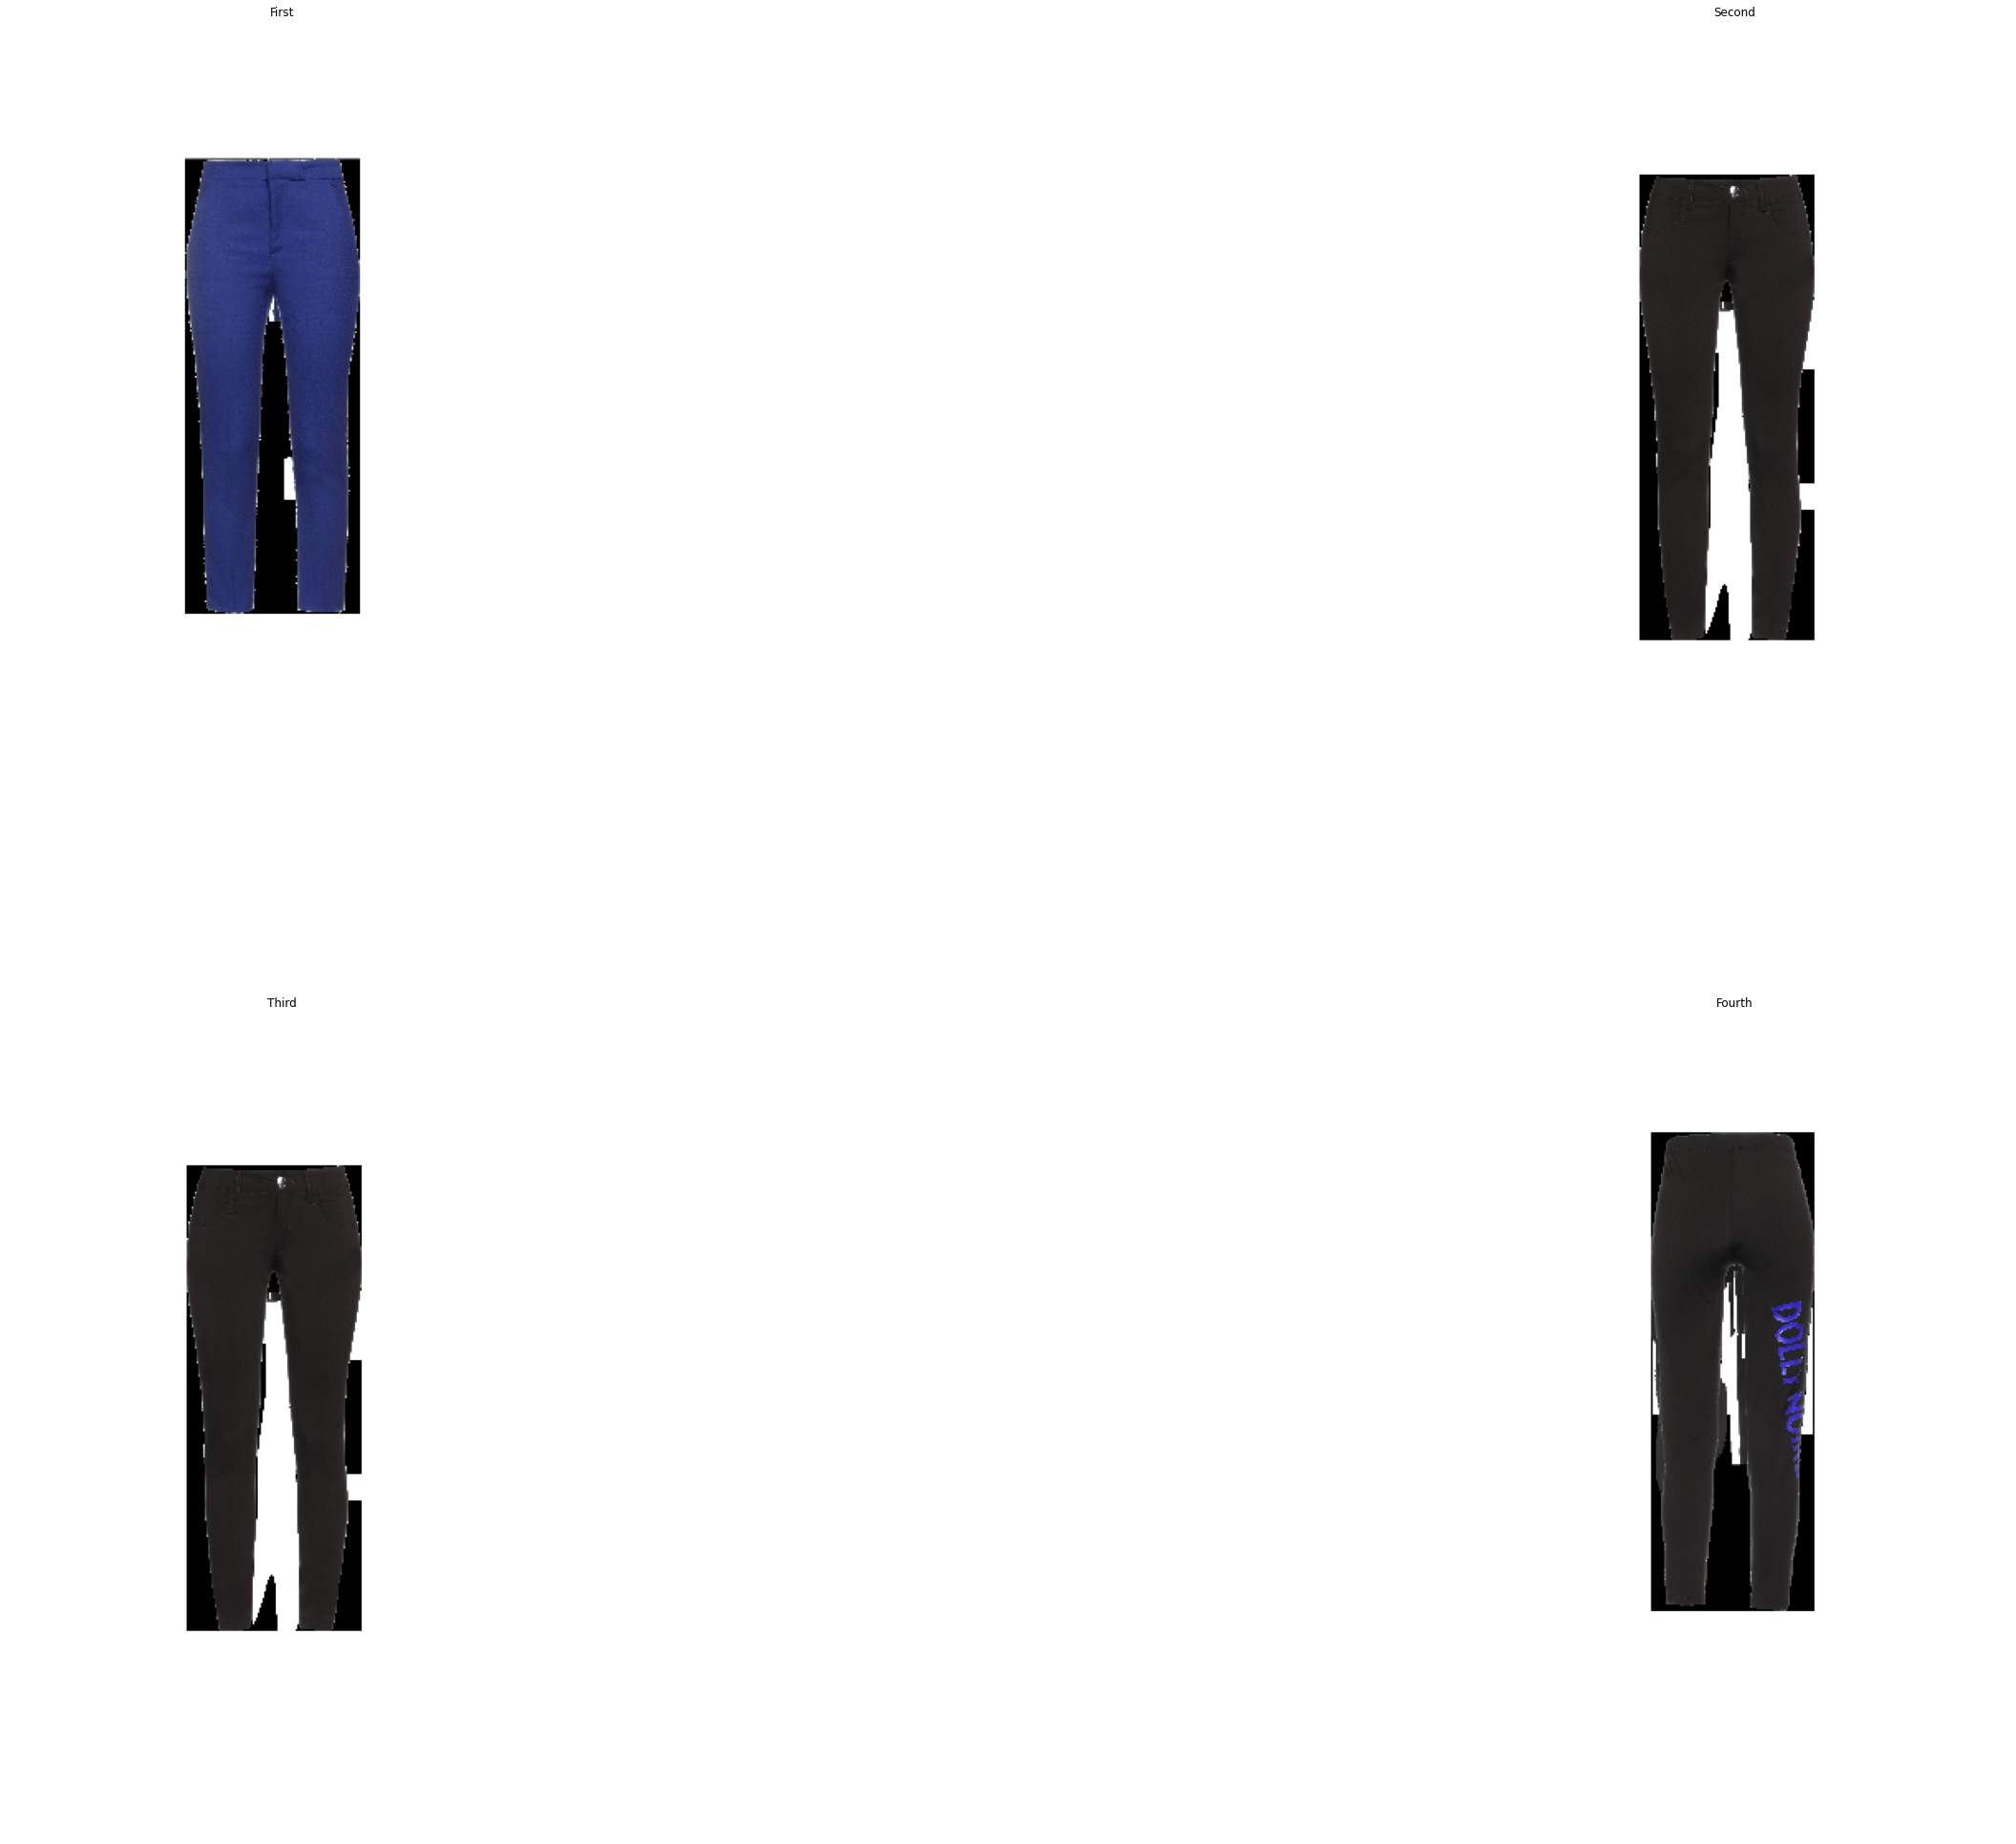

In [ ]:
# code for displaying multiple images in one figure
  
#import libraries
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(100,100))
  
# setting values to rows and column variables
rows = 5
columns = 2
  
# reading 

Image1 = cv2.imread('/content/bottoms_resized_png/13589082JLR.png')
Image2 = cv2.imread('/content/bottoms_resized_png/13400677WER.png')
Image3 = cv2.imread('/content/bottoms_resized_png/13400677WER.png')
Image4 = cv2.imread('/content/bottoms_resized_png/13586197WBD.png')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Fourth")

#**Method2: Using VGG-16 feature extractor and using L2 distances for calculating Similarity**

In [ ]:
from PIL import Image
from feature_extractor import FeatureExtractor
from pathlib import Path
import numpy as np

if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/bottoms_resized_png").glob("*.png")):
        print(img_path)  # e.g., ./static/img/xxx.jpg
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/feature") / (img_path.stem + ".npy")  # e.g., ./static/feature/xxx.npy
        np.save(feature_path, feature)


/content/bottoms_resized_png/13079565VVD.png
/content/bottoms_resized_png/13079565VVR.png
/content/bottoms_resized_png/13108390UDD.png
/content/bottoms_resized_png/13108390UDR.png
/content/bottoms_resized_png/13110484CLD.png
/content/bottoms_resized_png/13110484CLR.png
/content/bottoms_resized_png/13162479UBD.png
/content/bottoms_resized_png/13162479UBR.png
/content/bottoms_resized_png/13180761CUD.png
/content/bottoms_resized_png/13180761CUR.png
/content/bottoms_resized_png/13192537MCD.png
/content/bottoms_resized_png/13192537MCR.png
/content/bottoms_resized_png/13224618QUD.png
/content/bottoms_resized_png/13224618QUR.png
/content/bottoms_resized_png/13260596HKD.png
/content/bottoms_resized_png/13260596HKR.png
/content/bottoms_resized_png/13315564GCD.png
/content/bottoms_resized_png/13315564GCR.png
/content/bottoms_resized_png/13322221VND.png
/content/bottoms_resized_png/13322221VNR.png
/content/bottoms_resized_png/13339508HCD.png
/content/bottoms_resized_png/13339508HCR.png
/content/b

In [ ]:
!cp -r '/content/feature' '/content/drive/MyDrive/'

In [29]:
features = []
img_paths = []
for feature_path in Path("/content/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/bottoms_resized_png") / (feature_path.stem + ".png"))
features = np.array(features)

In [47]:
fe = FeatureExtractor()
query = fe.extract(img=Image.open('/content/bottoms_resized_png/13589082JLR.png'))
dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:10]  # Top 30 results
scores = [(dists[id], img_paths[id]) for id in ids]

In [48]:
print(str(scores[1][1]))


/content/bottoms_resized_png/13224618QUR.png


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(200, 200))
columns = 2
rows = 5
for i in range(1, columns*rows +1):
    path = str(scores[i-1][1])
    img = cv2.imread(path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
home = '/content/bottoms_resized_png/35469965SND.png'
print(home[-15:-4])

35469965SND
